# Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1) A single cell estimate of the population 16+ for each state.
<br>
2) Controls for Hispanic Origin by age and sex.
<br>
3) Controls by Race, age and sex.
<br>


We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
#Importing Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\census_income.csv")
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [4]:
df.shape

(32560, 15)

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are No null value 

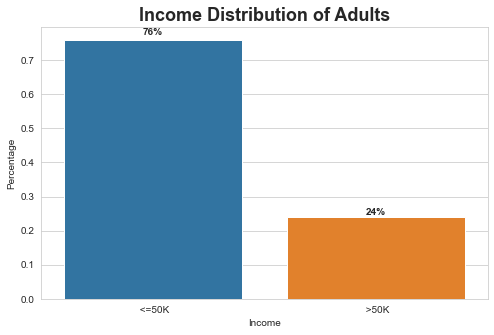

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['Income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Income', y = 'Percentage', data = eda_percentage.head(10))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

we can observe from above graph that  76 % idults are earned  less than 50k and 24% idults are earned below 50k 

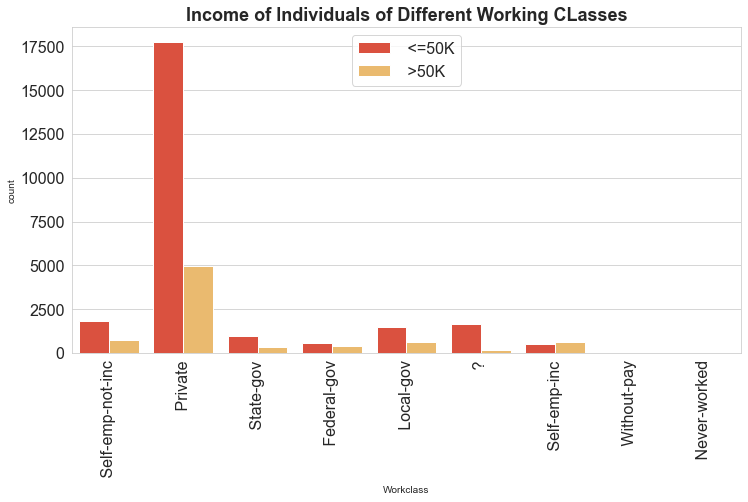

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(df['Workclass'], hue = df['Income'], palette='YlOrRd_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [9]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

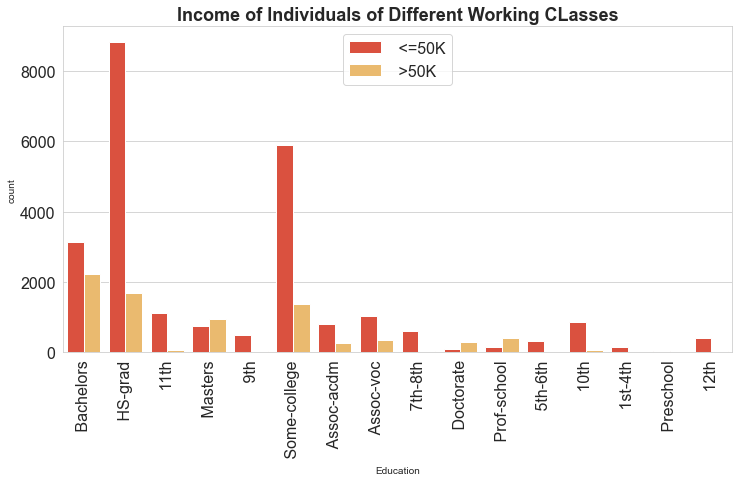

In [10]:
plt.figure(figsize=(12,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(df['Education'], hue = df['Income'], palette='YlOrRd_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

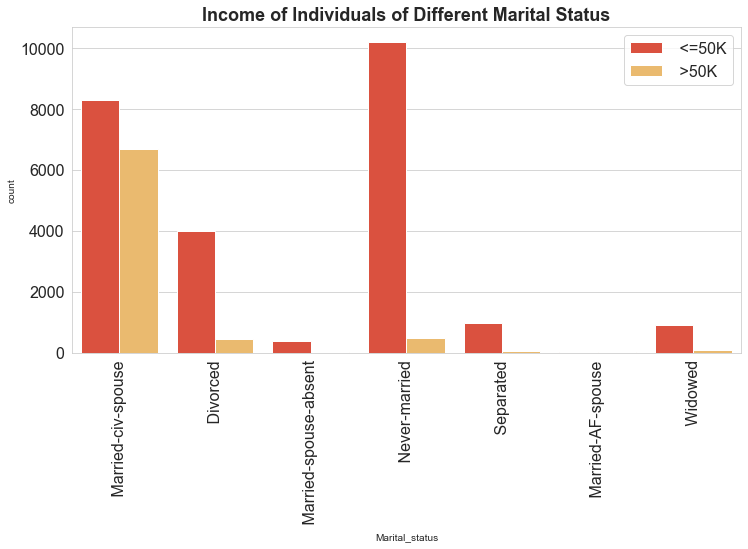

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df['Marital_status'], hue = df['Income'], palette='YlOrRd_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

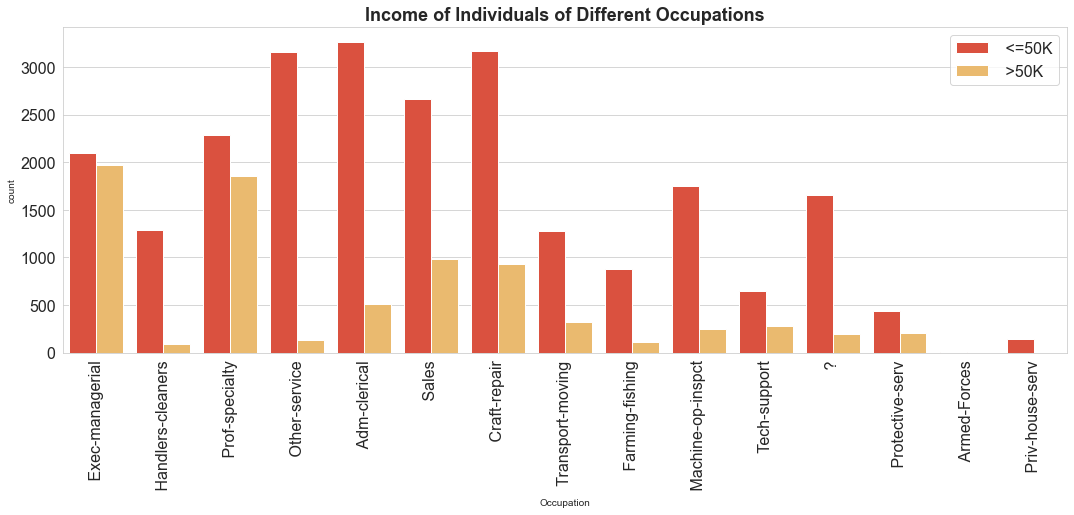

In [12]:
plt.figure(figsize=(18,6))
sns.countplot(df['Occupation'], hue = df['Income'], palette='YlOrRd_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

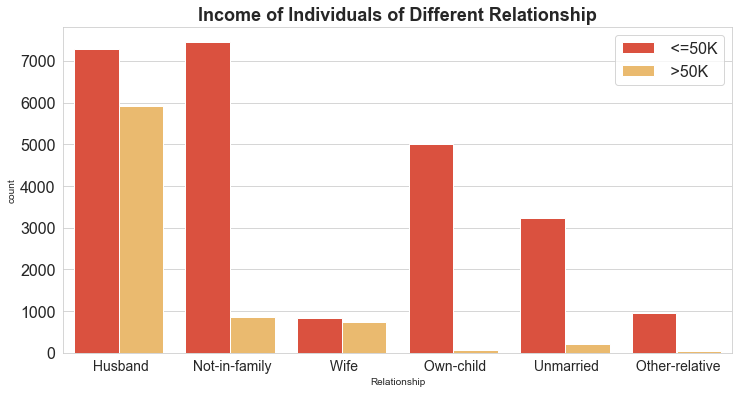

In [13]:
plt.figure(figsize=(12,6))

sns.countplot(df['Relationship'], hue = df['Income'], palette='YlOrRd_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

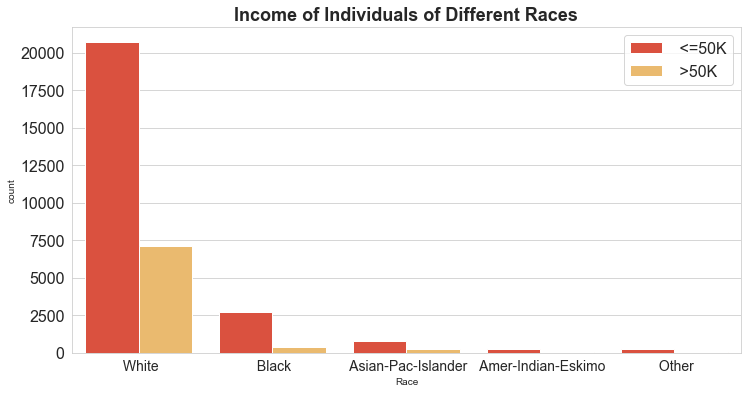

In [14]:
plt.figure(figsize=(12,6))

sns.countplot(df['Race'], hue = df['Income'], palette='YlOrRd_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

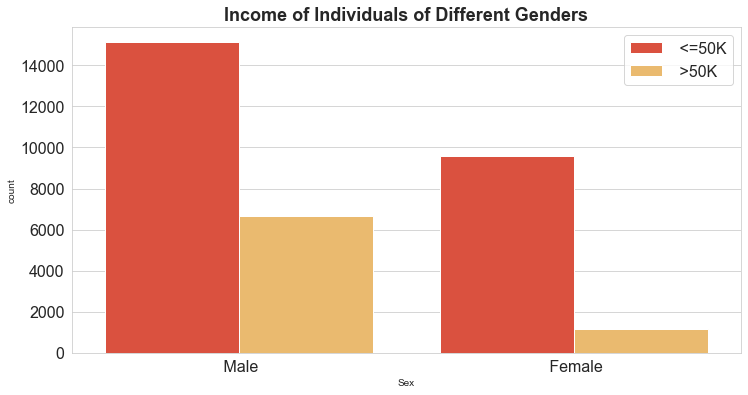

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(df['Sex'], hue = df['Income'], palette='YlOrRd_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


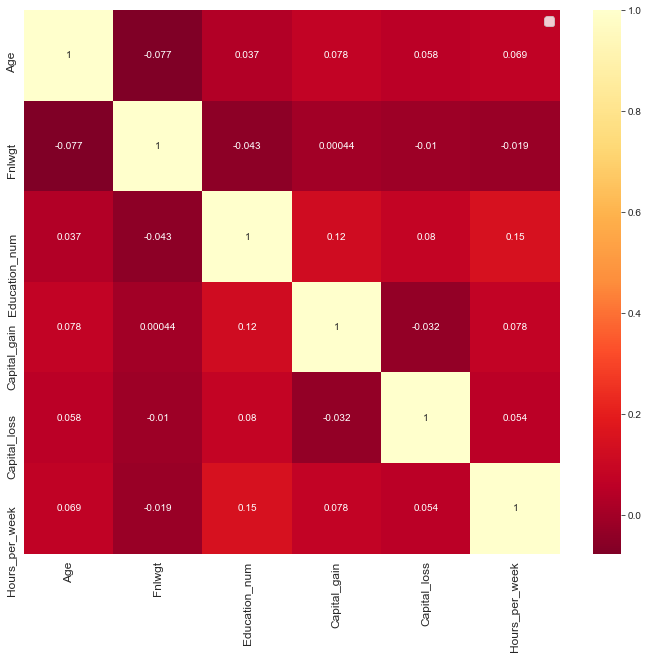

In [16]:


plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), cmap = 'YlOrRd_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

In [17]:
crosstabcat = pd.crosstab([df.Sex,df.Age,df.Marital_status,df.Income], df['Marital_status'],normalize='columns')
print(crosstabcat)

Marital_status                           Divorced   Married-AF-spouse  \
Sex     Age Marital_status      Income                                  
 Female 17   Married-civ-spouse  <=50K    0.00000                 0.0   
             Never-married       <=50K    0.00000                 0.0   
        18   Married-civ-spouse  <=50K    0.00000                 0.0   
             Never-married       <=50K    0.00000                 0.0   
        19   Divorced            <=50K    0.00135                 0.0   
...                                           ...                 ...   
 Male   90   Married-civ-spouse  <=50K    0.00000                 0.0   
                                 >50K     0.00000                 0.0   
             Never-married       <=50K    0.00000                 0.0   
                                 >50K     0.00000                 0.0   
             Widowed             <=50K    0.00000                 0.0   

Marital_status                           Married-c

In [18]:

df.drop(['Education_num'], axis = 1, inplace = True)
df['Education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['Race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)


## Model Implementation

In [19]:
from sklearn.preprocessing import LabelEncoder
Categorical_data = ['Workclass','Education', 'Marital_status', 'Occupation', 'Relationship',
               'Race', 'Sex','Native_country']
label_encoder = LabelEncoder()
for col in Categorical_data:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
    
from sklearn.model_selection import train_test_split
x = df[['Workclass','Education', 'Marital_status', 'Occupation', 'Relationship',
               'Race', 'Sex','Native_country', 'Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
y = df['Income']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [22]:
lm_conf_matrix = confusion_matrix(y_test, lm_predict)
lm_acc_score = accuracy_score(y_test, lm_predict)
print(lm_conf_matrix)
print(lm_acc_score)

[[7149  305]
 [1583  731]]
0.8067158067158067


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)


In [24]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[6937  517]
 [ 876 1438]]
0.8573914823914824


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [27]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      7454
        >50K       0.68      0.49      0.57      2314

    accuracy                           0.82      9768
   macro avg       0.77      0.71      0.73      9768
weighted avg       0.81      0.82      0.81      9768



In [28]:
from sklearn.svm import SVC

In [29]:
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

In [30]:
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score)

[[6937  517]
 [ 876 1438]]
0.8573914823914824


In [32]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=15)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=10)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [34]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.7390025  0.7428333  0.74941724 0.7496894  0.73897009]
Mean Scores 0.7439825061047529
Standard deviation 0.004761311625765596
Y Prediction values
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


array([[21489,  3230],
       [ 2943,  4898]], dtype=int64)

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8625102375102375
[[6973  481]
 [ 862 1452]]
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7454
        >50K       0.75      0.63      0.68      2314

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768

